# Apriori Algorithm 

Apriori Algorithm is the most classical and influential algorithm for mining frequent item sets for boolean association rules, which means that it finds interesting patterns and relationships between variables in a data set. It was proposed by R. Agrawal and R. Srikant in 1994.The name of  the algorithm is Apriori because it uses prior knowledge of frequent item set properties.



Apriori employs an iterative approach known as level-wise search, where k-item sets are used to explore (k+1) item sets. It is designed to operate on database containing transactions.

## The main principle of Apriori Algorithm  

### "All subsets of a frequent item set must be frequent."

### "If a item set is infrequent all its super sets will be infrequent."

## Algorithm showed in easy steps

Step 1. Start with item sets containing just a single item.

Step 2. Determine the support for item sets. Keep the item sets that meet your minimum support threshold, and remove item sets that do not.

Step 3. Using the item sets you have kept from Step 1, generate all the possible item set configurations. 

Step 4. Repeat Steps 2 & 3 until there are no more new item sets.

## Association Rules

Association rules analysis is a technique to uncover how items are associated to each other. There are three main rules which are applicable to this algorithm.

### Support

Support is an indication of how frequently the itemset appears in the dataset. In other words, it shows how popular an item is. The support of  X with respect to T is defined as the proportion of transactions t in the dataset which contains the itemset  X.
<img src="./images/image6.png">

### Confidence

Confidence is an indication of how often the rule has been found to be true. This shows how likely item Y is selected when item X is selected, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. 
<img src="./images/image7.png">

### Lift

Lift the ratio of the observed support to that expected if X and Y were independent. This says how likely item Y is selected when item X is selected, while controlling for how popular item Y is.
<img src="./images/image8.png">

### Convicton
The conviction of an association rule R = X → Y is the inverse lift of the rule R' = X → not Y. 

The conviction states by what factor the correctness of the rule (as expressed by its confidence) would reduce if the antecedent and the consequent of the rule were independent. A high value therefore means that the consequent depends strongly on the antecedent. 

<img src="./images/image10.png">


## Data Setup


I took the data from https://github.com/rahulsengupta/BasketAnalysis_Groceries/blob/master/groceries.csv and converted the csv file's rows into arrays. 

In [1]:

import csv
with open('./data/groceries.csv', 'r') as csvfile:
    g = csv.reader(csvfile, delimiter=',', quotechar='"')
    g_data = []
    for row in g:
        g_data.append(row)


## Algorithm Run

i am using mlxtend package to execute the apriori algorithm.

More information about mlxtend can be found at http://rasbt.github.io/mlxtend/

Installation details are on http://rasbt.github.io/mlxtend/installation/
 

In [9]:
# pip! install mlxtend 
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
 
oht = TransactionEncoder()
oht_ary = oht.fit(g_data).transform(g_data)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Using the apriori()  from mlxtend, we get the frequent itemsets , with a min_support= 0.03 in our groceries file.

In [10]:
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
5,0.064870,(brown bread)
6,0.055414,(butter)
7,0.077682,(canned beer)
8,0.042908,(chicken)
9,0.049619,(chocolate)


using association_rules() from mlxtend we get the rules from the frequent itemsets.

we can set the metric to support, confidence, lift, leverage or conviction.

I choose to use conviction

In [11]:
rules = association_rules(frequent_itemsets, metric="conviction", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
1,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
2,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
3,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
6,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
7,(pip fruit),(whole milk),0.075648,0.255516,0.030097,0.397849,1.557043,0.010767,1.236375
8,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344


## Plots and Graphs




C:\python\envs\py27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\python\envs\py27\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


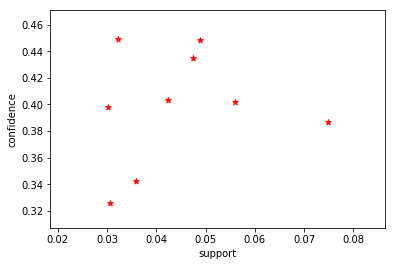

In [12]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

import random
import matplotlib.pyplot as plt

    
plt.scatter(support, confidence,   alpha=0.9, color = 'red', marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


#This graph shows the relationship between support and confidence of the generated values from rules.

The below graph shows a Network of the rules and how they associate the antecedents and consequents. 

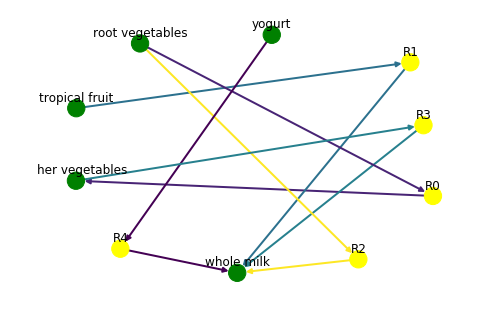

In [14]:
def draw_graph(rules, rules_to_show):
    import networkx as nx  
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11','R12']   
    for i in range (rules_to_show):      
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c]) 
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]
 
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
    for p in pos:  # raise text positions
        pos[p][1] += 0.09
    nx.draw_networkx_labels(G1, pos)
    plt.show()
    
    
draw_graph(rules,5)


## Discussion

The figure above shows the first five rules in form of a network, starting with R0. (R0,R1,R3...RX where R stands for Rule and X the rule number)

We can see that people who bought root vegetables also bought other vegetables,
people who bought yogurt also bought whole milk,
people who bought tropical fruit also bought whole milk,
people who bought other vegetables also bought whole milk and
people who bought root vegatables also bought whole milk.

Also in the first five rules, we observe that the most bought item is whole milk as it has more number of incoming arrows (is consequent to many items).


## Reference

- [1] "How to Create Data Visualization for Association Rules in Data Mining" by owygs156 http://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/
- [2] https://github.com/rahulsengupta/BasketAnalysis_Groceries/blob/master/groceries.csv by Rahul Sen Gupta
- [3] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
- [4] https://en.wikipedia.org/wiki/Apriori_algorithm
- [5] https://stackoverflow.com/questions/28990778/read-csv-rows-as-arrays-python
- [6] http://rasbt.github.io/mlxtend/
- [7] http://rasbt.github.io/mlxtend/installation/
- [8] http://www.borgelt.net/doc/apriori/apriori.html